**Perform EDA**

***
### For data preparation, I have performed the following operations:
* Remove row with negative value 
* Removed the outliners from the dataset 
* Create original training/testing dataset and balanced traning/testing dataset

### The end results are 3 sets of data for machine learning - original dataset without any modification, dataset with negative record and outliner removed, and balanced dataset. 
***

1. Import the required components

In [86]:
# adding required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline


pd.options.display.float_format = '{:.3f}'.format #plt.style.use('bmh')
pd.set_option('display.max_columns', None) #set display options for columns

2. Read Dataset and explore data format

In [87]:
# read data from file
df = pd.read_csv('../data/raw/NBA_train.csv')
df.head(10)

Id  GP    MIN    PTS   FGM    FGA    FG%  3P Made    3PA     3P%   FTM  \
0  3799  80 24.300  7.800 3.000  6.400 45.700    0.100  0.300  22.600 2.000   
1  3800  75 21.800 10.500 4.200  7.900 55.100   -0.300 -1.000  34.900 2.400   
2  3801  85 19.100  4.500 1.900  4.500 42.800    0.400  1.200  34.300 0.400   
3  3802  63 19.100  8.200 3.500  6.700 52.500    0.300  0.800  23.700 0.900   
4  3803  63 17.800  3.700 1.700  3.400 50.800    0.500  1.400  13.700 0.200   
5  3804  88 20.000  8.800 3.700  8.700 43.600   -0.200 -0.500   6.900 2.000   
6  3805  70 20.600  7.000 3.200  5.400 58.900    0.100 -0.100  -3.600 0.700   
7  3806  57 17.600  5.400 1.700  4.700 37.200    0.900  2.800  33.200 1.400   
8  3807  46 26.500  9.300 3.100  7.200 44.000    0.600  1.700  27.500 2.000   
9  3808  64 33.400 16.900 6.400 11.300 59.000    0.300  1.100 -13.000 3.700   

    FTA    FT%  OREB  DREB    REB   AST   STL   BLK   TOV  TARGET_5Yrs  
0 2.900 72.100 2.200 2.000  3.800 3.200 1.100 0.200 1.600            1  
1 3.600 67.800 3.600 3.700  6.600 0.700 0.500 0.600 1.400            1  
2 0.600 75.700 0.600 1.800  2.400 0.800 0.400 0.200 0.600            1  
3 1.500 66.900 0.800 2.000  3.000 1.800 0.400 0.100 1.900            1  
4 0.500 54.000 2.400 2.700  4.900 0.400 0.400 0.600 0.700            1  
5 2.800 75.100 1.800 2.900  4.700 1.800 0.400 0.300 1.100            1  
6 1.400 56.700 2.900 4.600  7.600 0.600 0.400 0.700 1.200            1  
7 1.800 78.300 0.800 1.700  2.600 0.400 0.600 0.600 0.300            1  
8 2.300 82.100 1.300 2.800  4.100 1.800 0.700 0.600 1.700            1  
9 4.900 74.900 3.400 8.000 11.900 0.800 0.400 2.500 2.400            1

In [88]:
df_org = df.copy() #copy the data

# Remove rows with negative values
df = df[(df >= 0).all(axis=1)]

print("Dataset shape after removing rows with negative values:", df.shape)

Dataset shape after removing rows with negative values: (4954, 21)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954 entries, 0 to 7997
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           4954 non-null   int64  
 1   GP           4954 non-null   int64  
 2   MIN          4954 non-null   float64
 3   PTS          4954 non-null   float64
 4   FGM          4954 non-null   float64
 5   FGA          4954 non-null   float64
 6   FG%          4954 non-null   float64
 7   3P Made      4954 non-null   float64
 8   3PA          4954 non-null   float64
 9   3P%          4954 non-null   float64
 10  FTM          4954 non-null   float64
 11  FTA          4954 non-null   float64
 12  FT%          4954 non-null   float64
 13  OREB         4954 non-null   float64
 14  DREB         4954 non-null   float64
 15  REB          4954 non-null   float64
 16  AST          4954 non-null   float64
 17  STL          4954 non-null   float64
 18  BLK          4954 non-null   float64
 19  TOV        

3. Check Data Statistics

In [90]:
df.shape

(4954, 21)

In [91]:
# Check record counts
count1 = df[df['TARGET_5Yrs']==1].shape[0]
print('5yrs = 1: ', count1)
count2 = df[df['TARGET_5Yrs']==0].shape[0]
print('5yrs = 0: ', count2)


5yrs = 1:  4212
5yrs = 0:  742


In [92]:
# Finding the number of row containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


In [93]:
# check for null values.
print(df.isnull().sum())

Id             0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


In [94]:
df.describe()

Id       GP      MIN      PTS      FGM      FGA      FG%  \
count  4954.000 4954.000 4954.000 4954.000 4954.000 4954.000 4954.000   
mean   7793.751   64.983   20.846    8.264    3.169    7.086   44.373   
std    2295.958   16.834    9.145    4.508    1.770    3.753    5.762   
min    3799.000    3.000    3.800    0.900    0.300    0.900   25.700   
25%    5804.500   54.000   14.100    5.000    1.800    4.300   40.500   
50%    7804.500   65.000   19.300    7.400    2.800    6.300   44.300   
75%    9759.500   76.000   26.100   10.700    4.100    9.100   48.200   
max   11796.000  123.000   73.800   34.200   13.100   28.900   67.200   

       3P Made      3PA      3P%      FTM      FTA      FT%     OREB     DREB  \
count 4954.000 4954.000 4954.000 4954.000 4954.000 4954.000 4954.000 4954.000   
mean     0.418    1.237   24.006    1.525    2.104   72.449    1.091    2.389   
std      0.286    0.792   13.030    0.954    1.269    9.786    0.715    1.375   
min      0.000    0.000    0.000    0.000    0.000   37.900    0.000    0.200   
25%      0.200    0.600   14.100    0.800    1.200   66.300    0.600    1.400   
50%      0.400    1.100   23.100    1.350    1.900   72.200    0.900    2.100   
75%      0.600    1.700   32.900    2.000    2.800   78.100    1.500    3.100   
max      1.700    4.700   73.700    8.100   11.100  132.500    5.500   10.800   

           REB      AST      STL      BLK      TOV  TARGET_5Yrs  
count 4954.000 4954.000 4954.000 4954.000 4954.000     4954.000  
mean     3.486    1.815    0.722    0.325    1.374        0.850  
std      2.004    1.404    0.423    0.538    0.752        0.357  
min      0.400    0.000    0.000    0.000    0.100        0.000  
25%      2.000    0.800    0.400    0.100    0.800        1.000  
50%      3.100    1.500    0.600    0.200    1.200        1.000  
75%      4.500    2.400    0.900    0.400    1.800        1.000  
max     14.600   12.800    3.600   18.900    5.300        1.000

In [95]:
# remove outliers from the dataset
from scipy import stats

# Calculate the Z-scores of the dataset
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for the Z-score
threshold = 3

# Filter out the outliers
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)

Original dataset shape: (4954, 21)
Dataset shape after removing outliers: (4569, 21)


4. Data Visualisation

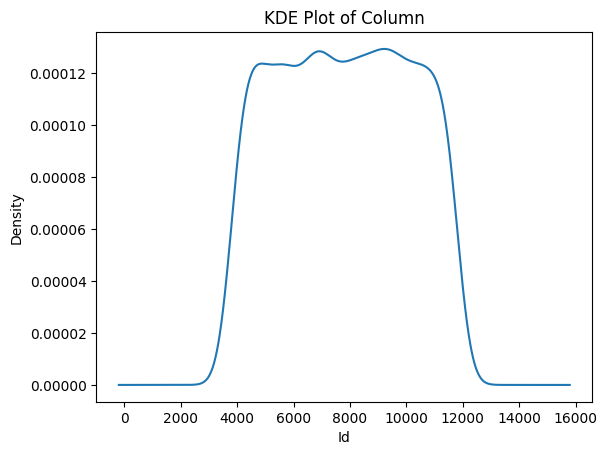

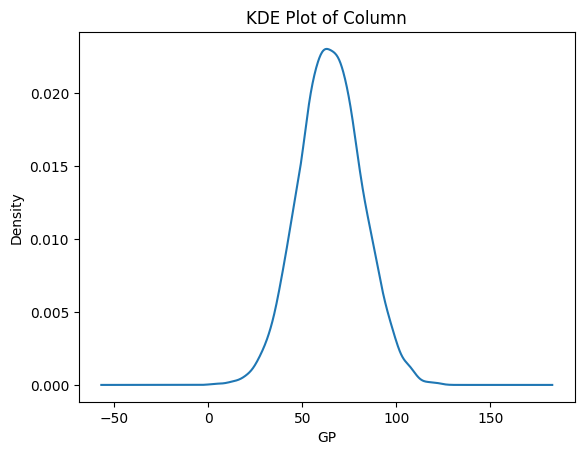

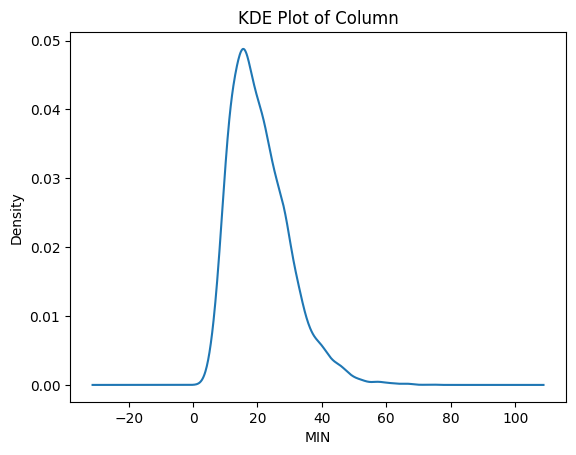

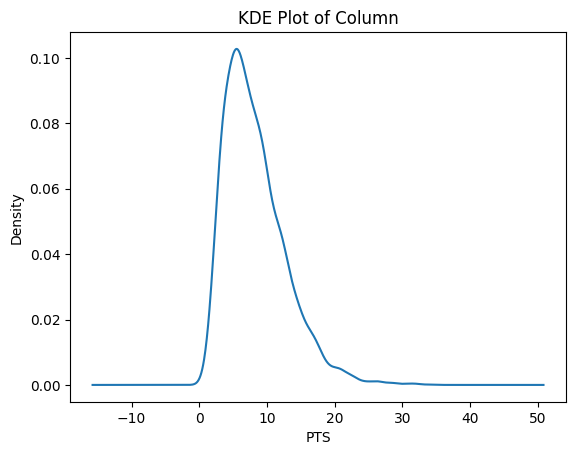

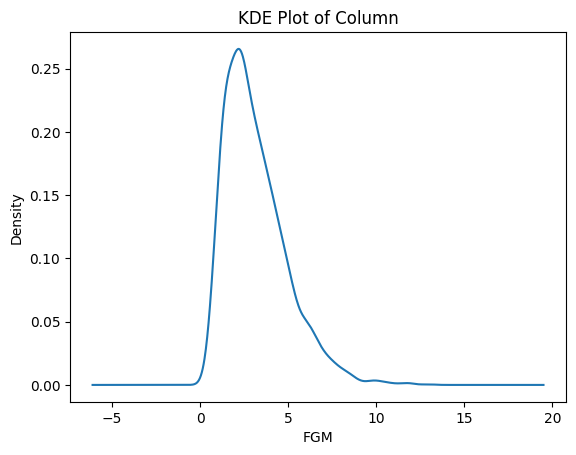

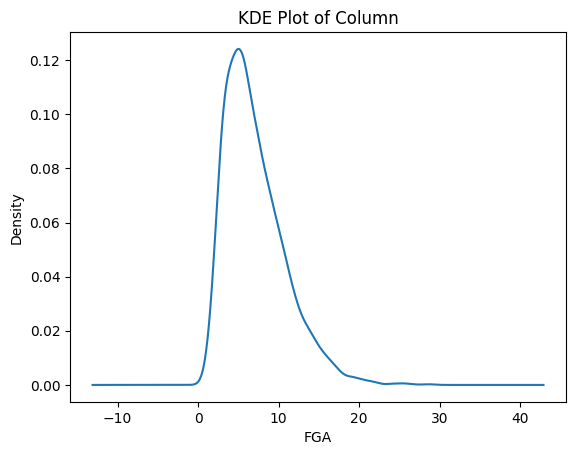

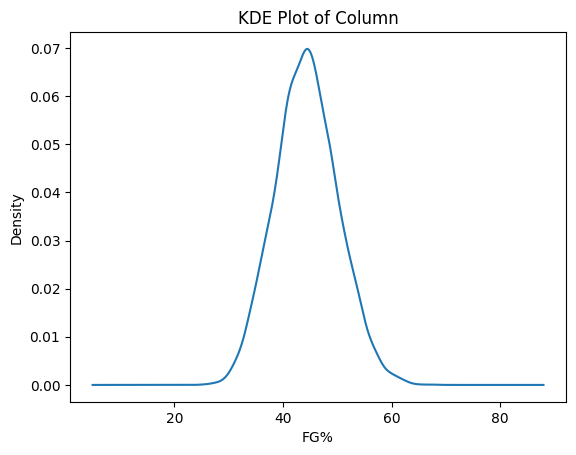

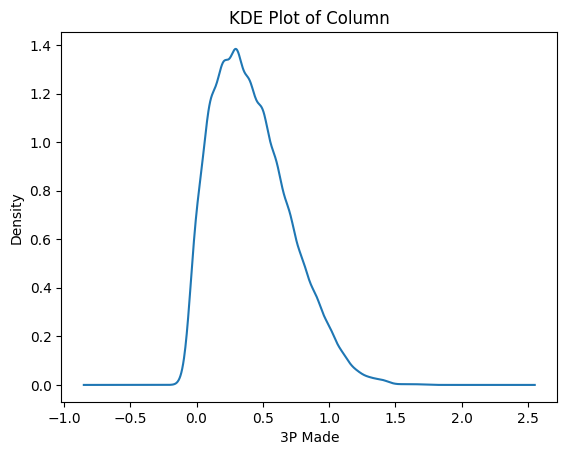

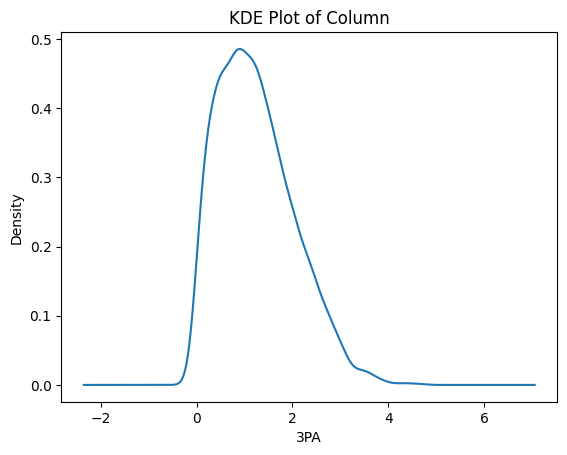

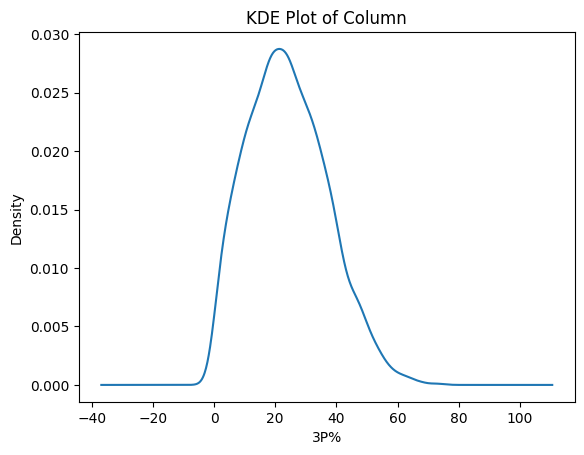

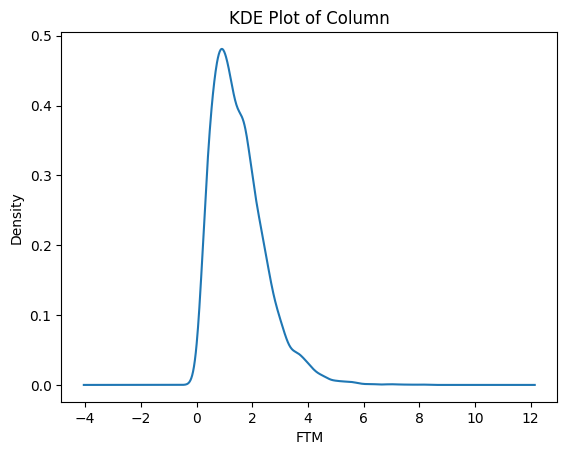

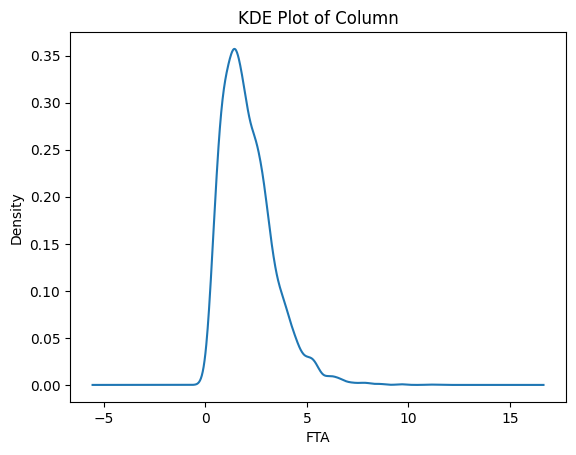

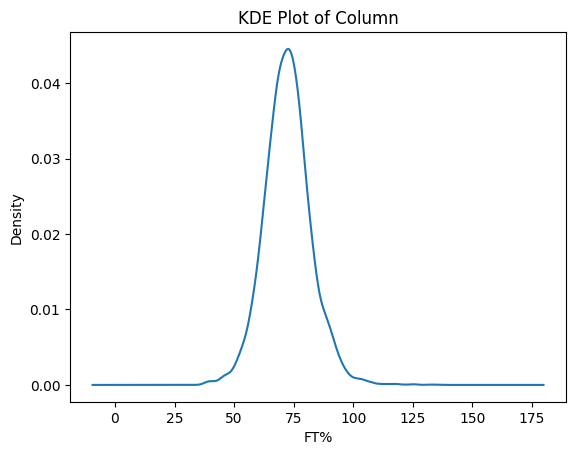

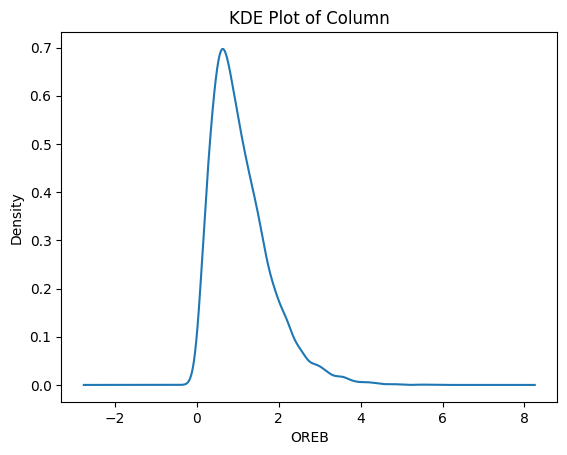

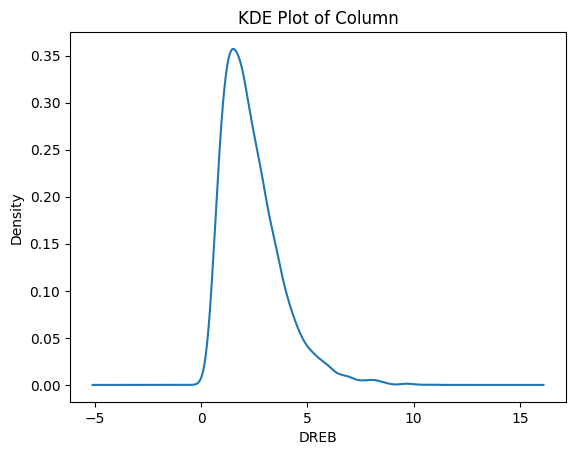

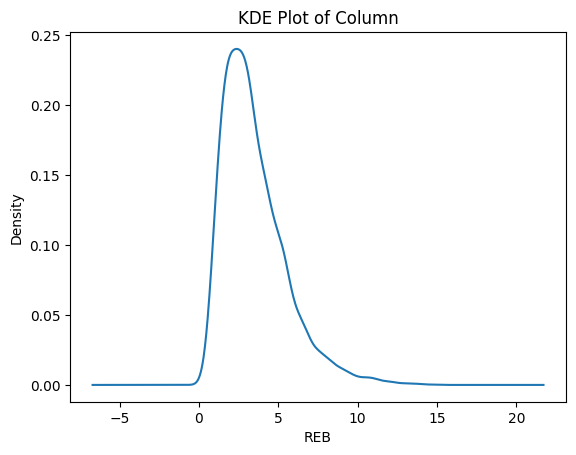

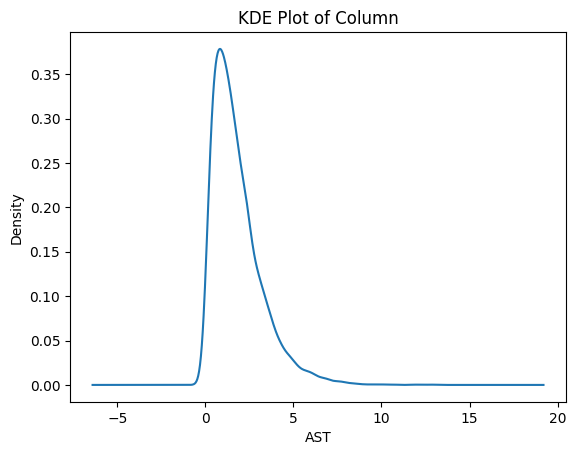

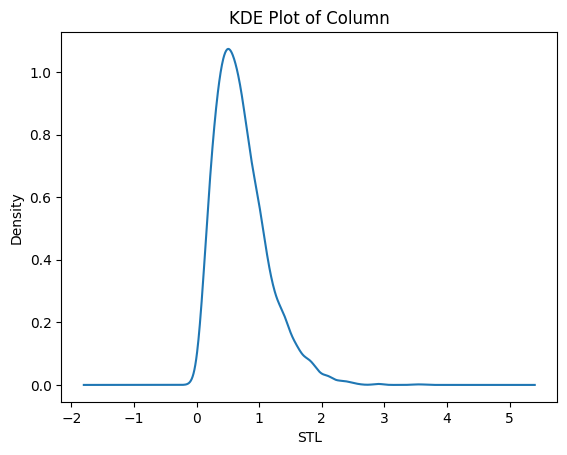

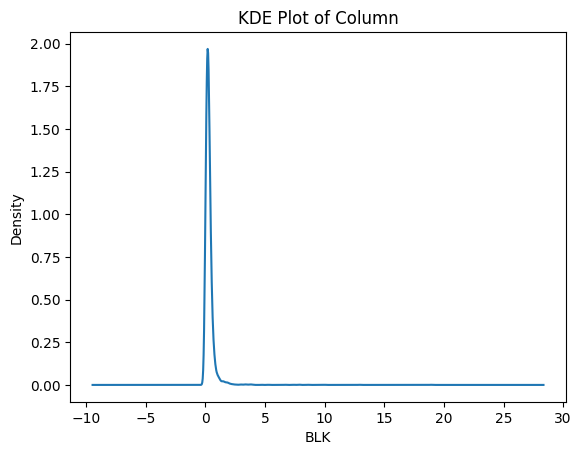

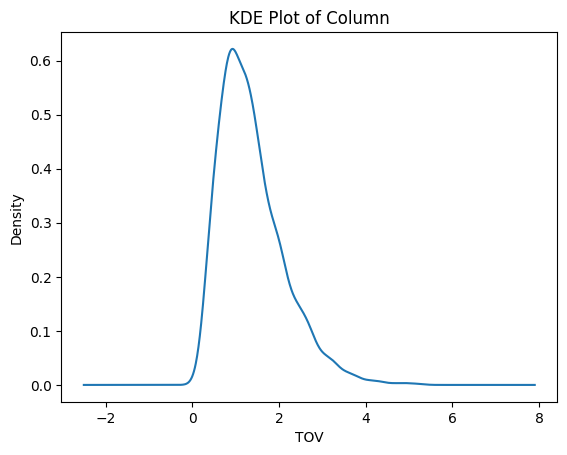

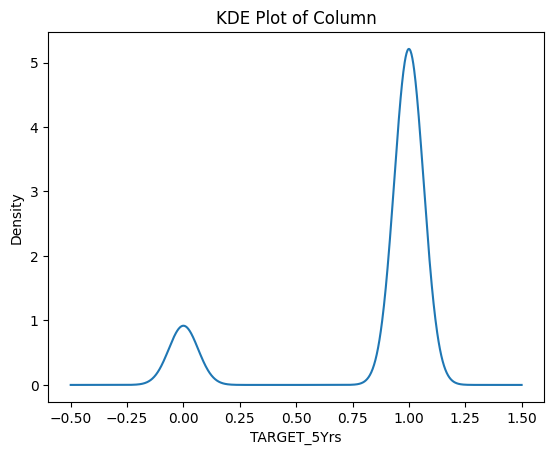

In [96]:
#Check the distribution of all columns and try to identify abnormal data
for col in df.columns:
    column_data = df[col]

    column_data.plot(kind='kde')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('KDE Plot of Column')
    plt.show()

f:\projects\Assignment\ADSI_Assignment\.venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


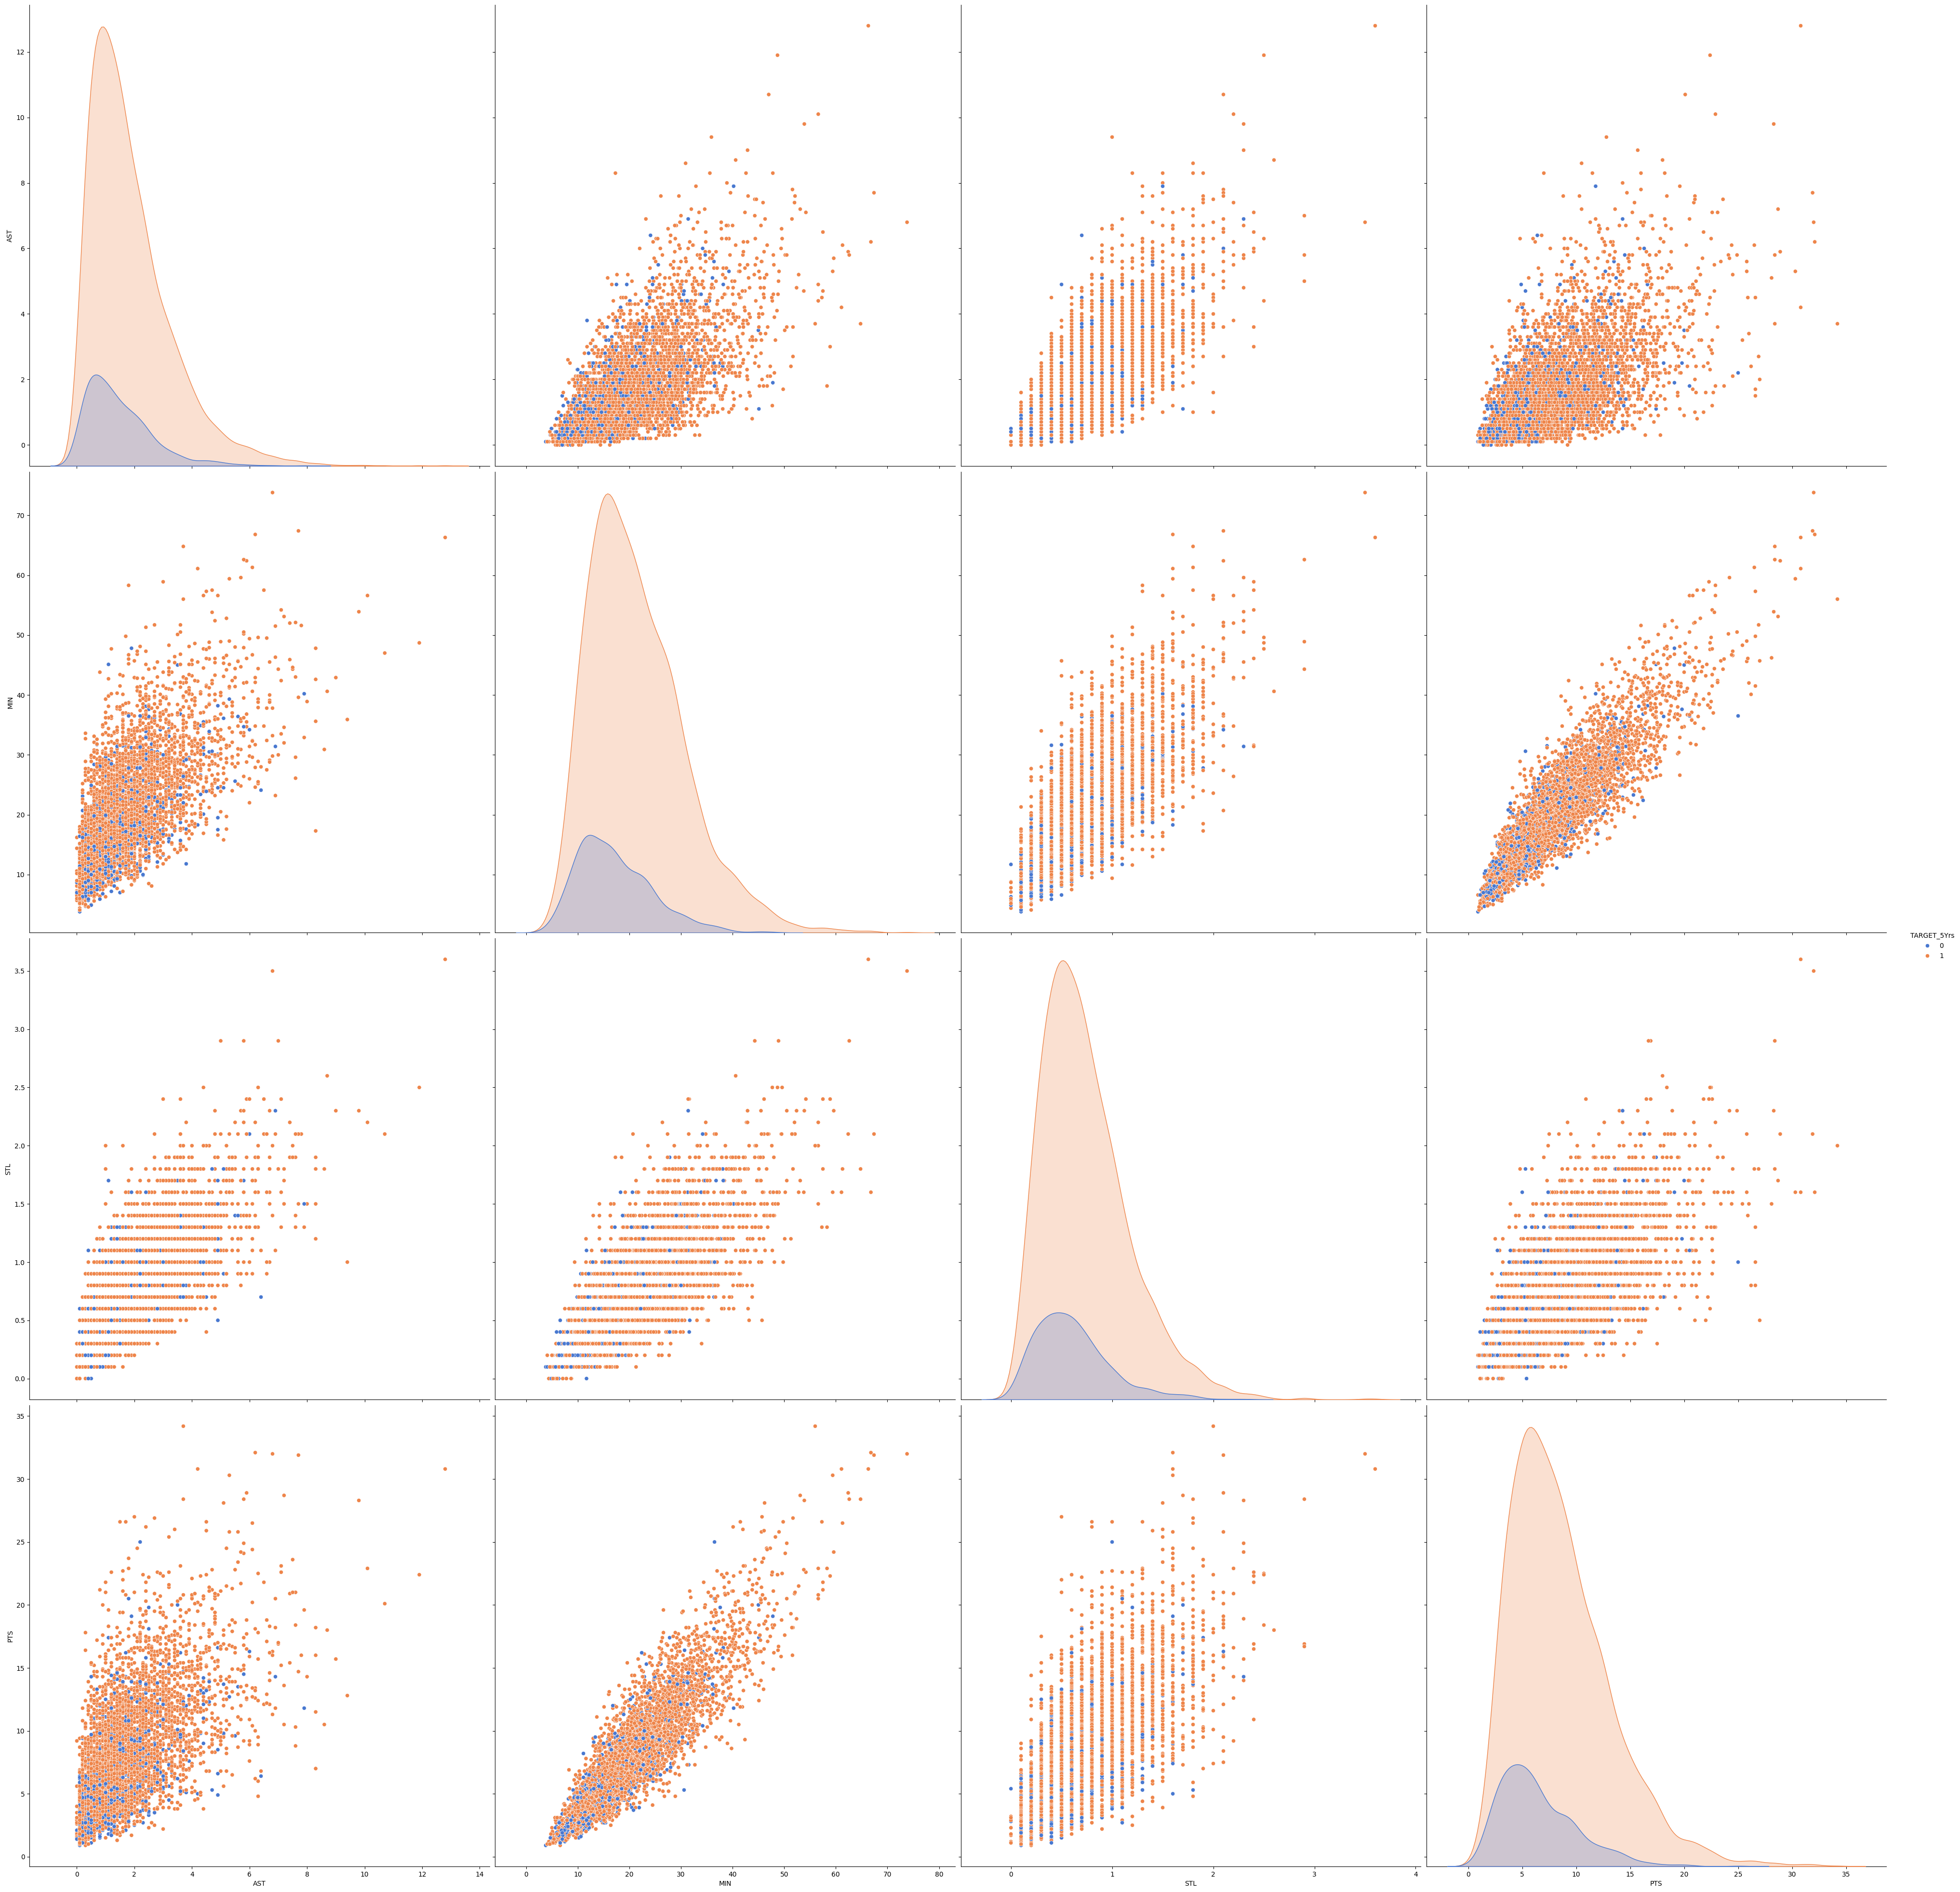

In [75]:
dl = df[['AST', 'MIN','STL', 'PTS', 'TARGET_5Yrs']]
sns.pairplot(dl, kind='scatter', diag_kind='kde',hue='TARGET_5Yrs', palette='muted',size = 10)
plt.show()

In [77]:
import altair as alt

# sample_df = df.sample(n=5000, random_state=42)

brush = alt.selection_interval()

chart =alt.Chart(df).mark_point().encode(
    x='MIN',
    y='STL',
    #color=alt.Color('TARGET_5Yrs', scale=alt.Scale(range=['red', 'blue'])),
    color=alt.condition(brush, 'TARGET_5Yrs', alt.value('lightgray')),
    tooltip=['MIN', 'STL','PTS','AST','TARGET_5Yrs']
).add_params(
    brush
)

chart | chart.encode(x='PTS', y='AST')

alt.HConcatChart(...)

5. Create datasets for machine learning

In [97]:
# split data into feature and target
x = df_no_outliers.drop(['Id','TARGET_5Yrs'], axis=1)# drop the ID field
# x = df[['PTS']]
y = df_no_outliers[['TARGET_5Yrs']]
y.head()

TARGET_5Yrs
0            1
2            1
3            1
4            1
7            1

In [98]:
# split the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_data_org, x_test_org, y_data_org, y_test_org = train_test_split(df_org.drop(['Id','TARGET_5Yrs'], axis=1), df_org[['TARGET_5Yrs']], test_size=0.2, random_state=42)

7. Create Balanced datasets using under sampling method

In [99]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


In [100]:
from imblearn.under_sampling import ClusterCentroids

'''
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_oversample, y_oversample = smote.fit_resample(x_data, y_data)

print("Oversample /n")
print(y_oversample.value_counts(normalize=True))
print(x_oversample.shape)
'''

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_balanced, y_balanced = rus.fit_resample(x, y)

print("RandomUnderSampler /n")
print(y_ru.value_counts(normalize=True))
print(x_ru.shape)

# split the dataset into training and testing set
x_balanced_data, x_balanced_test, y_balanced_data, y_balanced_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)


RandomUnderSampler /n
TARGET_5Yrs
0             0.500
1             0.500
Name: proportion, dtype: float64
(1134, 20)


In [101]:
# Export the data to csv
x_data_org.to_csv('../data/interim/x_data_org.csv', index=False)
y_data_org.to_csv('../data/interim/y_data_org.csv', index=False)
x_data.to_csv('../data/interim/x_data.csv', index=False)
y_data.to_csv('../data/interim/y_data.csv', index=False)
x_balanced_data.to_csv('../data/interim/x_balanced_data.csv', index=False)
y_balanced_data.to_csv('../data/interim/y_balanced_data.csv', index=False)

x_test_org.to_csv('../data/interim/x_test_org.csv', index=False)
y_test_org.to_csv('../data/interim/y_test_org.csv', index=False)
x_test.to_csv('../data/interim/x_test.csv', index=False)
y_test.to_csv('../data/interim/y_test.csv', index=False)
x_balanced_test.to_csv('../data/interim/x_balanced_test.csv', index=False)
y_balanced_test.to_csv('../data/interim/y_balanced_test.csv', index=False)



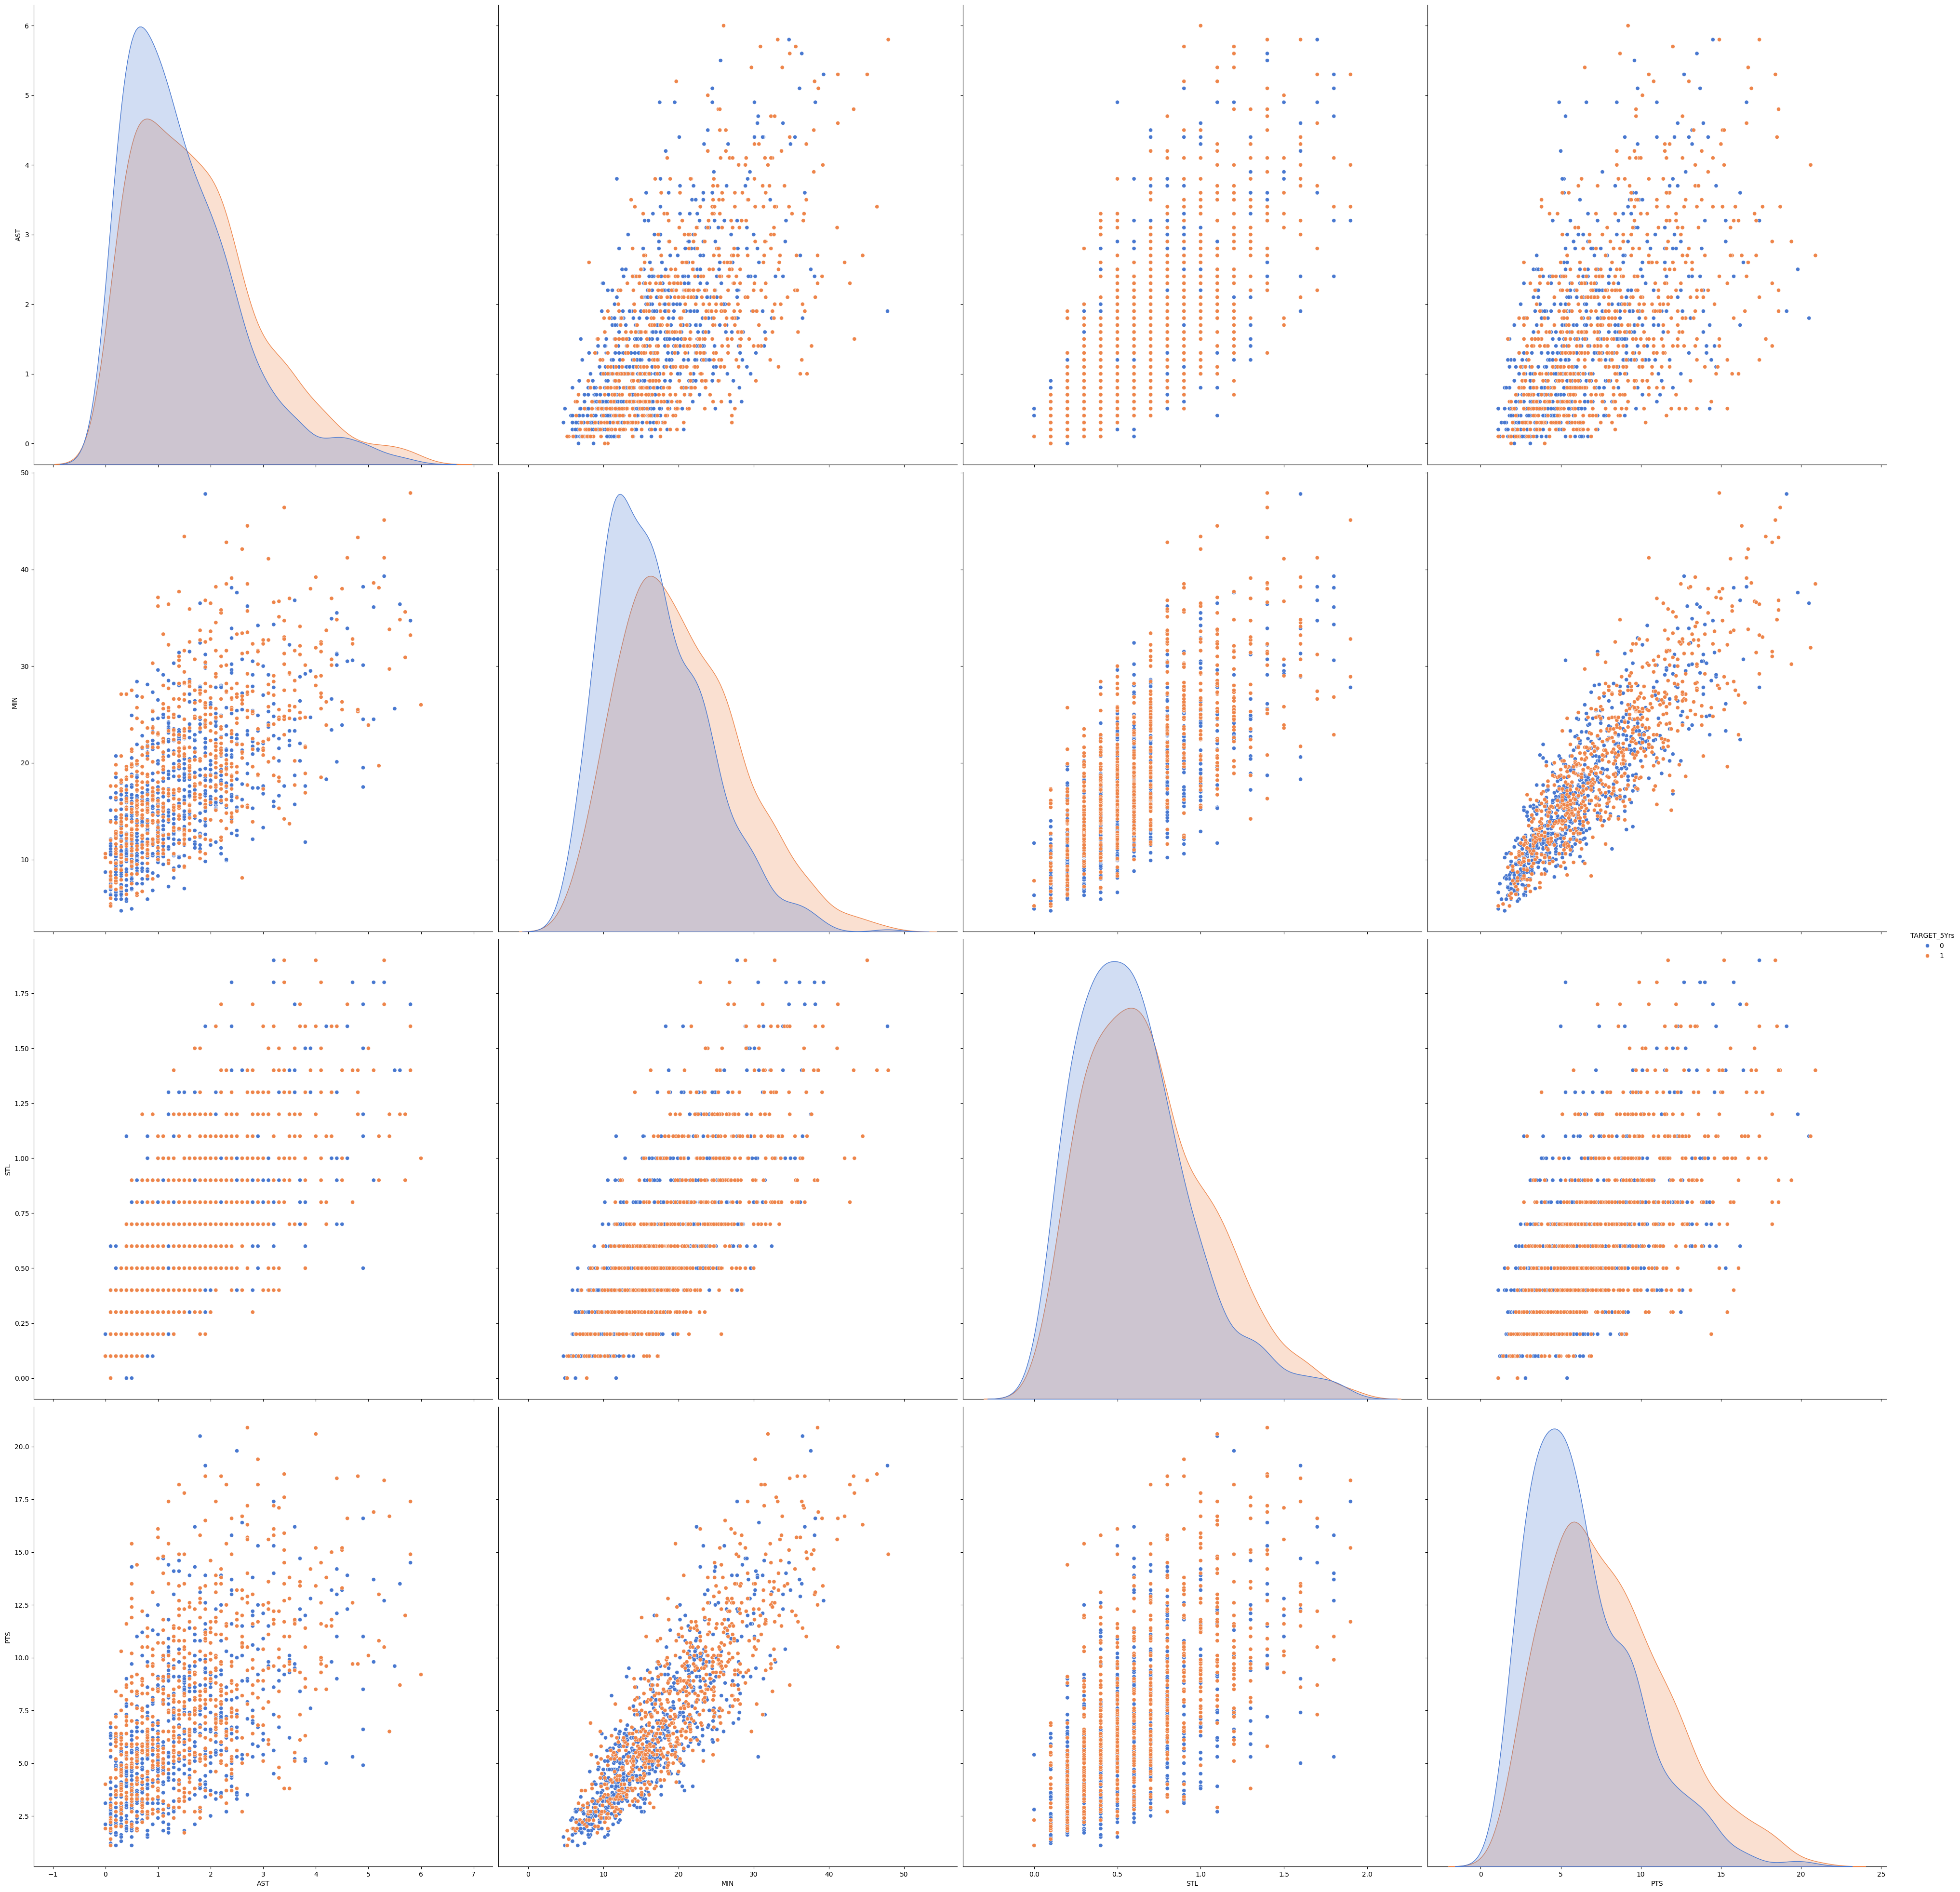

In [102]:
# Combine x_balanced and y_balanced into one dataset and view the distribution
oversample_combined = pd.concat([x_balanced, y_balanced], axis=1)

dl = oversample_combined[['AST', 'MIN','STL', 'PTS', 'TARGET_5Yrs']]
sns.pairplot(dl, kind='scatter', diag_kind='kde',hue='TARGET_5Yrs', palette='muted',height = 10)
plt.show()